<a href="https://colab.research.google.com/github/MarianaGrandis00/Diplomatura-Business-Analytics-UDA-Mendoza/blob/main/TP-Modulo-8-Garcia-Grandis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logo](https://github.com/cristiandarioortegayubro/BA/blob/main/dba.png?raw=true)

# **Trabajo Final - Módulo 8 - Aprendizaje Automático - Machine Learning**

![logo](https://www.python.org/static/community_logos/python-powered-w-100x40.png)

~~~
Fabián García - Mariana Grandis
~~~

# **Carga de módulos y datos necesarios**

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
url = "https://raw.githubusercontent.com/cristiandarioortegayubro/BA/main/Datasets/banco.csv"


In [ ]:
analisis = pd.read_csv(url,index_col=0)
analisis.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# **Análisis Exploratorio de los datos**

## Visualización del conjunto de datos

In [ ]:
analisis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


## Dimensión del conjunto de datos y valores nulos y faltantes

In [ ]:
analisis.replace({"unknown": None}, inplace=True)

In [ ]:
analisis.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,None,5,may,261,1,-1,0,None,no
1,44,technician,single,secondary,no,29,yes,no,None,5,may,151,1,-1,0,None,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,None,5,may,76,1,-1,0,None,no
3,47,blue-collar,married,None,no,1506,yes,no,None,5,may,92,1,-1,0,None,no
4,33,None,single,None,no,1,no,no,None,5,may,198,1,-1,0,None,no
5,35,management,married,tertiary,no,231,yes,no,None,5,may,139,1,-1,0,None,no
6,28,management,single,tertiary,no,447,yes,yes,None,5,may,217,1,-1,0,None,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,None,5,may,380,1,-1,0,None,no
8,58,retired,married,primary,no,121,yes,no,None,5,may,50,1,-1,0,None,no
9,43,technician,single,secondary,no,593,yes,no,None,5,may,55,1,-1,0,None,no


In [ ]:
analisis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   8252 non-null   object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


In [ ]:
analisis.isnull().sum().sort_values(ascending = False)

poutcome     36959
contact      13020
education     1857
job            288
month            0
previous         0
pdays            0
campaign         0
duration         0
age              0
day              0
loan             0
housing          0
balance          0
default          0
marital          0
deposit          0
dtype: int64

## Variable Objetivo

In [ ]:
px.histogram(analisis, 
             x = analisis.deposit,
             title="Distribución variable objetivo", 
             color_discrete_sequence = ["green"],
             marginal="rug",
             template="gridon")

## Variables numéricas, análisis descriptivo

In [ ]:
round(analisis.select_dtypes(include=["float64", "int"]).describe(),2)

,age,numjob,nummarital,numeducation,numdefault,balance,numhousing,numloan,numcontact,day,month,duration,campaign,pdays,previous,numpoutcome
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,5.26,1.17,2.14,0.02,1362.27,0.56,0.16,0.78,15.81,6.14,258.16,2.76,40.20,0.58,0.29
std,10.62,3.26,0.61,0.65,0.13,3044.77,0.50,0.37,0.55,8.32,2.41,257.53,3.10,100.13,2.30,0.70
min,18.00,0.00,0.00,1.00,0.00,-8019.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,-1.00,0.00,0.00
25%,33.00,2.00,1.00,2.00,0.00,72.00,0.00,0.00,0.00,8.00,5.00,103.00,1.00,-1.00,0.00,0.00
50%,39.00,5.00,1.00,2.00,0.00,448.00,1.00,0.00,1.00,16.00,6.00,180.00,2.00,-1.00,0.00,0.00
75%,48.00,8.00,2.00,3.00,0.00,1428.00,1.00,0.00,1.00,21.00,8.00,319.00,3.00,-1.00,0.00,0.00
max,95.00,11.00,2.00,3.00,1.00,102127.00,1.00,1.00,2.00,31.00,12.00,4918.00,63.00,871.00,275.00,3.00


## Otras variables, análisis descriptivo

In [ ]:
analisis.select_dtypes(include=["object"]).describe()

,job,marital,education,default,housing,loan,contact,poutcome,deposit
count,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,None,no
freq,9732,27214,23202,44396,25130,37967,29285,36959,39922


## Correlación de variables

In [ ]:
corr_matrix = analisis.select_dtypes(include=['float64', 'int']).corr(method='pearson')

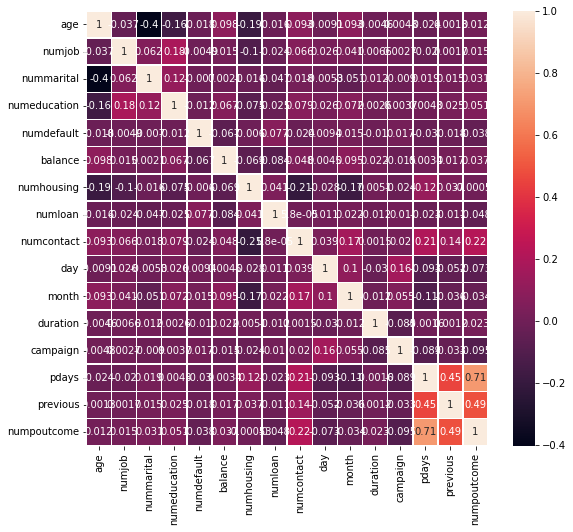

In [ ]:
plt.figure(figsize=(9,8))
sns.heatmap(corr_matrix, 
            annot=True,
            linewidths=.5)

plt.show()

## Graficos de variables

In [ ]:
fig = px.histogram(analisis, 
                   x = analisis.age,
                   title="Distribucion Age",
                   template="gridon")
fig.show()

In [ ]:
fig = px.histogram(analisis, 
                   x = analisis.numeducation,
                   title="Distribucion Education",
                   template="gridon")
fig.show()

In [ ]:
fig = px.histogram(analisis, 
                   x = analisis.month,
                   title="Distribucion month",
                   template="gridon")
fig.show()

# **División del conjunto de datos**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(analisis.drop('deposit', axis = 'columns'),
                                                    analisis['deposit'],train_size   = 0.8,
                                                    random_state = 2021, shuffle = True)

In [ ]:
X_train.shape

(36168, 24)

In [ ]:
X_test.shape

(9043, 24)

In [ ]:
y_test.shape

(9043,)

# **Preprocesamiento**

## Imputación de valores faltantes

In [ ]:
analisis.head (10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,None,5,may,261,1,-1,0,None,no
1,44,technician,single,secondary,no,29,yes,no,None,5,may,151,1,-1,0,None,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,None,5,may,76,1,-1,0,None,no
3,47,blue-collar,married,None,no,1506,yes,no,None,5,may,92,1,-1,0,None,no
4,33,None,single,None,no,1,no,no,None,5,may,198,1,-1,0,None,no
5,35,management,married,tertiary,no,231,yes,no,None,5,may,139,1,-1,0,None,no
6,28,management,single,tertiary,no,447,yes,yes,None,5,may,217,1,-1,0,None,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,None,5,may,380,1,-1,0,None,no
8,58,retired,married,primary,no,121,yes,no,None,5,may,50,1,-1,0,None,no
9,43,technician,single,secondary,no,593,yes,no,None,5,may,55,1,-1,0,None,no


In [ ]:
analisis.education[3]

In [ ]:
analisis.numeducation[3]

2

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputacion = SimpleImputer(missing_values=0, strategy="most_frequent")

In [ ]:
analisis.numeducation = imputacion.fit_transform(analisis[["numeducation"]])

In [ ]:
analisis.numeducation[0]

3

In [ ]:
analisis.head (10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,None,5,may,261,1,-1,0,None,no
1,44,technician,single,secondary,no,29,yes,no,None,5,may,151,1,-1,0,None,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,None,5,may,76,1,-1,0,None,no
3,47,blue-collar,married,None,no,1506,yes,no,None,5,may,92,1,-1,0,None,no
4,33,None,single,None,no,1,no,no,None,5,may,198,1,-1,0,None,no
5,35,management,married,tertiary,no,231,yes,no,None,5,may,139,1,-1,0,None,no
6,28,management,single,tertiary,no,447,yes,yes,None,5,may,217,1,-1,0,None,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,None,5,may,380,1,-1,0,None,no
8,58,retired,married,primary,no,121,yes,no,None,5,may,50,1,-1,0,None,no
9,43,technician,single,secondary,no,593,yes,no,None,5,may,55,1,-1,0,None,no


## Codificación de variables no numéricas

In [ ]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [ ]:
convertir = LabelEncoder()

In [ ]:
analisis.job = analisis.job.apply(str)
analisis.marital = analisis.marital.apply(str)
analisis.education = analisis.education.apply(str)
analisis.default = analisis.default.apply(str)
analisis.housing = analisis.housing.apply(str)
analisis.loan = analisis.loan.apply(str)
analisis.contact = analisis.contact.apply(str)
analisis.month = analisis.month.apply(str)
analisis.poutcome = analisis.poutcome.apply(str)

In [ ]:
analisis.insert(2,column="numjob",value=convertir.fit_transform(analisis.job))
analisis.insert(4,column="nummarital",value=convertir.fit_transform(analisis.marital))
analisis.insert(6,column="numeducation",value=convertir.fit_transform(analisis.education))
analisis.insert(8,column="numdefault",value=convertir.fit_transform(analisis.default))
analisis.insert(11,column="numhousing",value=convertir.fit_transform(analisis.housing))
analisis.insert(13,column="numloan",value=convertir.fit_transform(analisis.loan))
analisis.insert(15,column="numcontact",value=convertir.fit_transform(analisis.contact))
analisis.insert(23,column="numpoutcome",value=convertir.fit_transform(analisis.poutcome))

In [ ]:
analisis.head(3)

,age,job,numjob,marital,nummarital,education,numeducation,default,numdefault,balance,...,numcontact,day,month,duration,campaign,pdays,previous,poutcome,numpoutcome,deposit
0,58,management,5,married,1,tertiary,3,no,0,2143,...,0,5,may,261,1,-1,0,None,0,no
1,44,technician,10,single,2,secondary,2,no,0,29,...,0,5,may,151,1,-1,0,None,0,no
2,33,entrepreneur,3,married,1,secondary,2,no,0,2,...,0,5,may,76,1,-1,0,None,0,no


Para codificar el mes usamos la funcion If y Elif

In [ ]:
analisis.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [ ]:
def mes(month):
  if month == "jan":
    return int("1")
  elif month == "feb":
    return int("2")
  elif month == "mar":
    return int("3")
  elif month == "apr":
    return int("4")
  elif month == "may":
    return int("5")
  elif month == "jun":
    return int("6")
  elif month == "jul":
    return int("7")
  elif month == "aug":
    return int("8")
  elif month == "sep":
    return int("9")
  elif month == "oct":
    return int("10")
  elif month == "nov":
    return int("11")
  else: 
    return int("12")

In [ ]:
analisis.month = analisis.month.apply(mes)

In [ ]:
analisis.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [ ]:
analisis.month

0        may
1        may
2        may
3        may
4        may
        ... 
45206    nov
45207    nov
45208    nov
45209    nov
45210    nov
Name: month, Length: 45211, dtype: object